<center>
<h1>
<b>Name: Nader M. Elhadedy</b><br>
<b>Task: Matrix Decomposition - Part 2</b>
</h1>
</center>


---

## Multicollinearity is the occurrence of high intercorrelations among two or more independent variables. In general, multicollinearity can lead to wider confidence intervals that produce less reliable probabilities in terms of the effect of independent variables in a model.

## Multicollinearity is a problem because it undermines the statistical significance of an independent variable.

# Import Packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create Correlated Dataset

In [ ]:
X, y = datasets.make_blobs(n_samples=2000, n_features=2, centers=2, cluster_std=1.5, random_state=40)

In [ ]:
df = pd.DataFrame(X, columns=['A', 'B'])

# Measure **correlation** between features

In [ ]:
df.corr()

,A,B
A,1.000000,0.787005
B,0.787005,1.000000


In [ ]:
df.corrwith(pd.Series(y))

A    0.928020
B    0.840283
dtype: float64

# Visualize Dataset

In [ ]:
plt.style.use('ggplot')

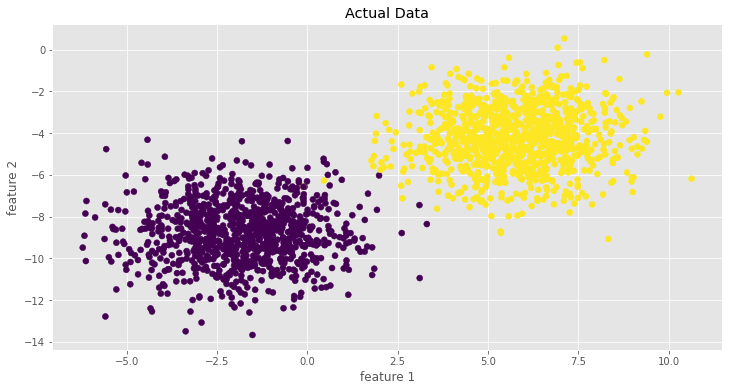

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df.A, df.B, c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Actual Data')
plt.show()

# Apply **decorrelation** with **PCA**

> ## We will use PCA to apply decorrelation on correlated features with the same dimensions. I chose whiten=True as it applies computations to ensure uncorrelated outputs. Whitening will remove some information from the transformed signal but can sometimes improve the predictive accuracy.

In [ ]:
X_set = np.matrix(df)

In [ ]:
pca = PCA(n_components=2, whiten=True)
X_tr = pca.fit_transform(X_set)

# Measure **correlation** again after PCA

In [ ]:
df_2 = pd.DataFrame(X_tr, columns=['A', 'B'])
df_2.corr()

,A,B
A,1.000000e+00,1.580360e-16
B,1.580360e-16,1.000000e+00


In [ ]:
df_2.corrwith(pd.Series(y))

A   -0.944956
B   -0.005174
dtype: float64

# Visualize Dataset after **PCA**

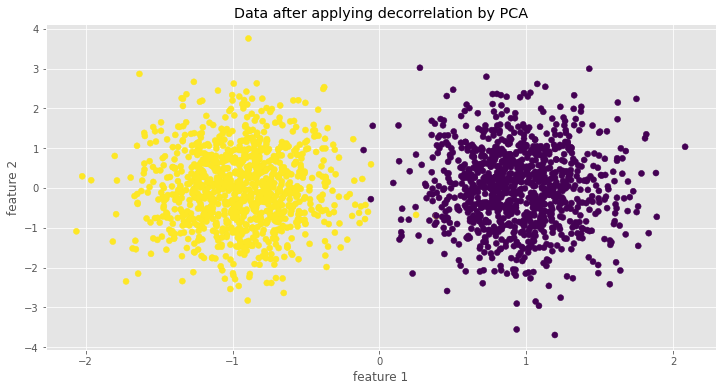

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df_2.A, df_2.B, c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Data after applying decorrelation by PCA')
plt.show()

# Apply **LDA** on decorrelated data

In [ ]:
X_decorr = np.matrix(df_2)

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
X_after_lda = lda.fit_transform(X_decorr, y)

In [ ]:
X_after_lda.shape

(2000, 1)

# Visualize Dataset after **LDA**

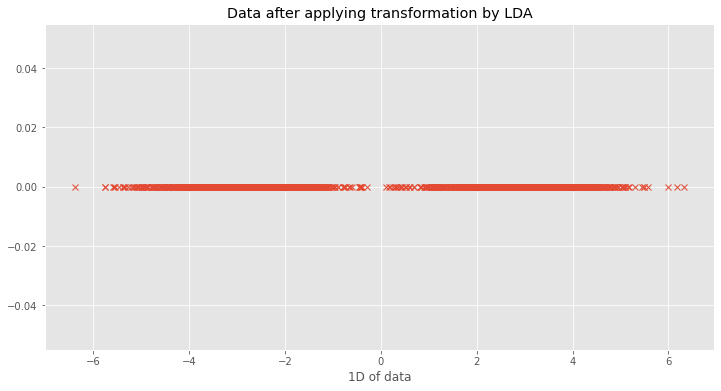

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(X_after_lda, np.zeros_like(X_after_lda) + 0, 'x')
plt.xlabel('1D of data')
plt.title('Data after applying transformation by LDA')
plt.show()

# Predict labels of `decorrelated data` with **LDA**

In [ ]:
y_new = lda.predict(X_decorr)

# Visualize data after prediction by **LDA**

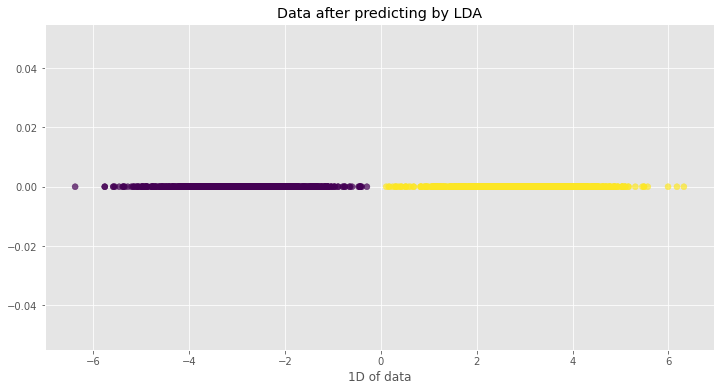

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X_after_lda, np.zeros_like(X_after_lda) + 0, c=y_new, alpha=0.7)
plt.xlabel('1D of data')
plt.title('Data after predicting by LDA')
plt.show()

# Measure accuracy score

In [ ]:
accuracy_score(y, y_new)

0.9975